In [168]:
import praw
import pandas as pd

In [169]:
#create client id and secret
CLIENT_ID = "Bh9UkFl1SyOiuQ"
CLIENT_SECRET = "kmUh5ExFCpORlrPZ-XQLB3xLjyE"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/Kolien_)"

In [170]:
#get the api
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [171]:
#read the api
api.read_only

True

In [172]:
#get the submissions
submissions = api.subreddit('learnpython').hot(limit = 500)
submissions

In [173]:
#get the submissions again, make a new list, set index to 0 and import time
submissions = api.subreddit('learnpython').hot(limit = 500)
newlist = []
index = 0
import time

#get all the submissions and add them to the list
for submission in submissions:
    submission.created_utc = time.ctime(submission.created_utc)
    newlist.append({
        "title" : submission.title,
        "score" : submission.score,
        "comments" : submission.num_comments,
        "author" : submission.author,
        "created_time" : submission.created_utc,
        "index" : index,
        "id" : submission.id
    })
    index = index + 1

In [174]:
#make a dateframe of the list
df = pd.DataFrame(newlist)

In [175]:
#print the the first 5 items
df.head()

,author,comments,created_time,id,index,score,title
0,AutoModerator,23,Mon Oct 22 02:15:10 2018,9q8m75,0,2,Ask Anything Monday - Weekly Thread
1,MattersOfMastery,62,Sun Oct 21 23:58:37 2018,9q7l55,1,129,I just spent two hours...
2,Ma_Dixie_Normous,44,Sun Oct 21 23:50:39 2018,9q7iz5,2,49,Python Udemy Courses - FREE
3,Dear_Suit,29,Sun Oct 21 15:31:21 2018,9q3ioe,3,197,A site that teaches Python from scratch throug...
4,Aykino,4,Mon Oct 22 01:40:18 2018,9q8cwd,4,23,Short python course aimed at machine learning/AI?


In [235]:
#count the number of submisions per author and print the first 10
df2 = df["author"].value_counts().head(10)
df2

GALOXITYv2        7
Proxxiiiii        6
alisutton         4
NaiveReception    4
Ricardo1500       4
jcoder42          4
Sci-Techtop       4
creamypuff95      3
Cyberzipper       3
saeah123ed        3
Name: author, dtype: int64

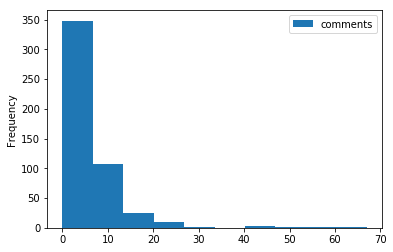

In [177]:
#plot the comments in a histogram
df.plot(y = "comments", kind = "hist", bins = 10)

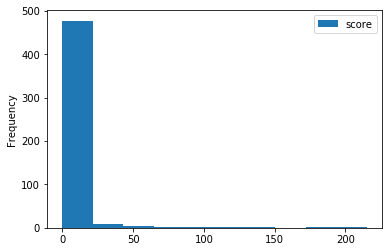

In [178]:
#plot the scores in a histogram
df.plot(y = "score", kind = "hist", bins = 10)

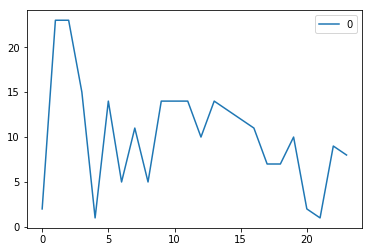

In [234]:
#converting time to only the hours
time = pd.Series(df.created_time)
split_time = time.str.split(" ")
index = 0
hours_time = []
for day in split_time:
    hours = split_time[index][3]
    hours = hours.split(":")
    hours_time.append(int(hours[0]))
    index = index + 1
df3 = pd.DataFrame(hours_time)

#plot the 24 hours
df3[0:24].plot(kind = "line")

In [190]:
#create a string with the id of the most comments
comments_high = df.sort_values("comments", ascending = False).head(1)
idcomments_high = comments_high["id"]
idcomments_high = str(idcomments_high)
idcomments_high = idcomments_high[7:13]
idcomments_high

'9onhbo'

In [220]:
#get the comments of the submission with the most comments
submission = api.submission(id = idcomments_high)
index2 = 0

#make a new list
comments_list = []

#scrape the comments and put it in a dict
for comment in submission.comments:
    if isinstance(comment, praw.models.MoreComments):
        continue
    comments_list.append({
        "body" : comment.body[0:100],
        "score" : comment.score,
        "author" : str(comment.author)
    })
    index2 = index2 + 1
    
#make a dataframe
df4 = pd.DataFrame(comments_list)
df4

,author,body,score
0,ben_kWh,"Not an analyst by title, but I'd say that was ...",29
1,Antreas93,I write atleast a line of code or two in pytho...,8
2,omgu8mynewt,working in research and learning to use python...,6
3,Ad2996,An analyst here and sometimes I have to do som...,14
4,git0ffmylawnm8,Another analyst here. I've moved almost entire...,4
5,almostablaze,I just got into Python and I am still reading ...,3
6,Pimp_Fada,New BI Analyst here. The sooner you move away ...,3
7,catelemnis,Python is definitely a good start. I would als...,3
8,MyPythonDontWantNone,"I'm only partially a data analyst, but I use P...",2
9,IgorFB,Have a look at Introduction to Python for Data...,2


In [224]:
#print the first 5
df4.head()

,author,body,score
0,ben_kWh,"Not an analyst by title, but I'd say that was ...",29
1,Antreas93,I write atleast a line of code or two in pytho...,8
2,omgu8mynewt,working in research and learning to use python...,6
3,Ad2996,An analyst here and sometimes I have to do som...,14
4,git0ffmylawnm8,Another analyst here. I've moved almost entire...,4


In [229]:
#group the authors and sum all the scores
df5 = df4.groupby("author")["score"].sum()
df5 = df5.sort_values(ascending = False)

#show the first 5
df5.head()

author
ben_kWh           29
Ad2996            14
Antreas93          8
omgu8mynewt        6
git0ffmylawnm8     4
Name: score, dtype: int64

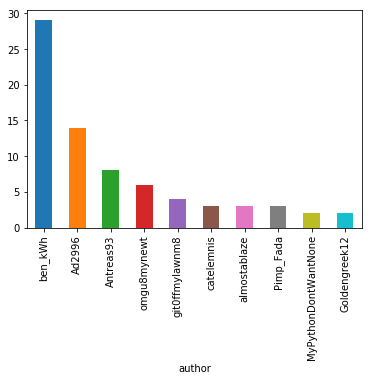

In [231]:
#plot the first 10 scores
df5[0:10].plot(kind = "bar")